STEP 1: Install dependencies

In [ ]:

!pip install pandas matplotlib seaborn --quiet





STEP 2: Import libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 STEP 3: Upload your dataset

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload your CSV file here
df = pd.read_csv(list(uploaded.keys())[0])

Saving carbon emissio.csv to carbon emissio.csv


In [ ]:
df = df.dropna(subset=['co2_emissions,_total_(ktco2)', 'Country code', 'Year'])

CO₂ Emissions Over Time (All Countries)

/tmp/ipython-input-5-2543296491.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


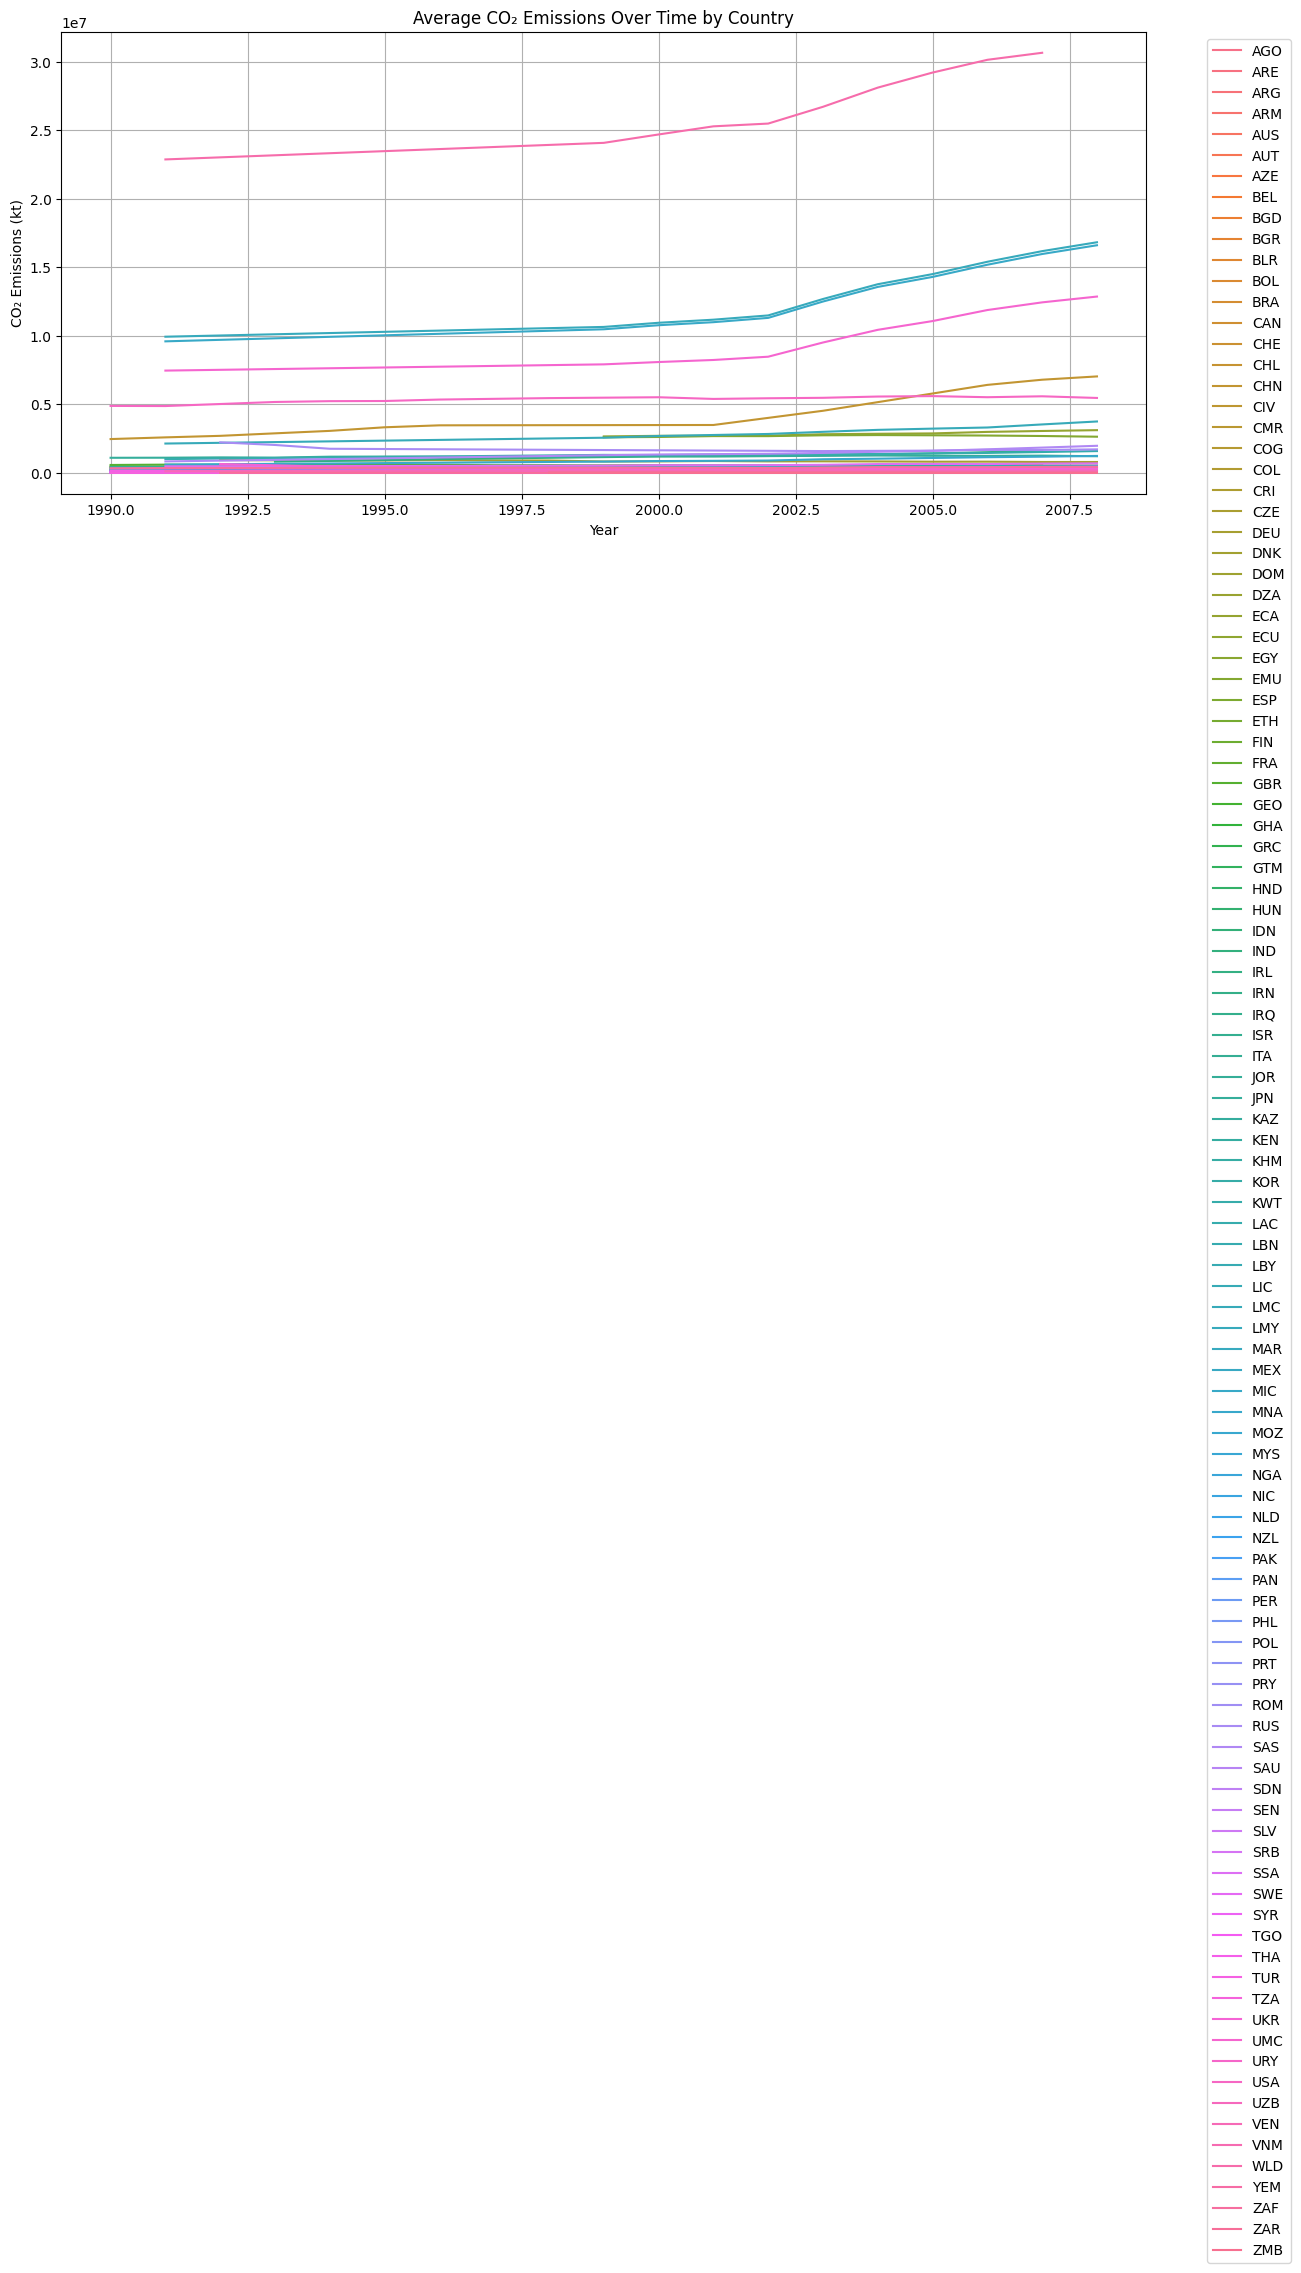

In [ ]:

plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Year', y='co2_emissions,_total_(ktco2)', hue='Country code', estimator='mean')
plt.title('Average CO₂ Emissions Over Time by Country')
plt.ylabel('CO₂ Emissions (kt)')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Top 10 Emitters (All Time Total)

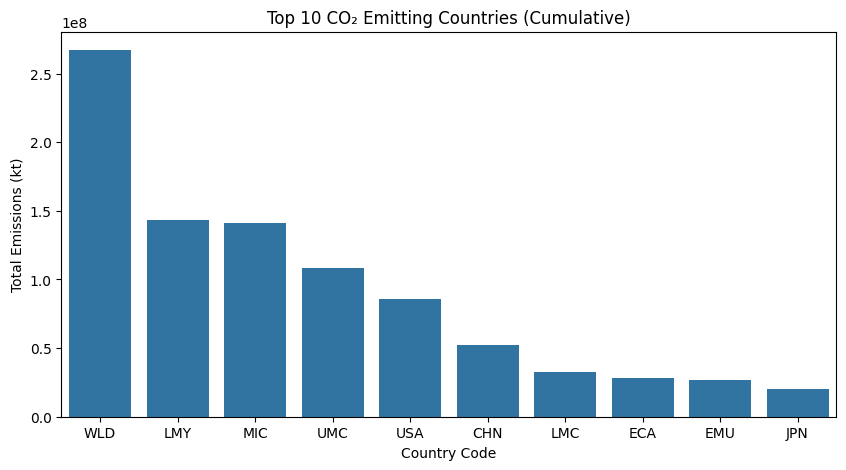

In [ ]:

top_emitters = df.groupby('Country code')['co2_emissions,_total_(ktco2)'].sum().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_emitters.index, y=top_emitters.values)
plt.title('Top 10 CO₂ Emitting Countries (Cumulative)')
plt.ylabel('Total Emissions (kt)')
plt.xlabel('Country Code')
plt.show()

Generate Correlation Matrix

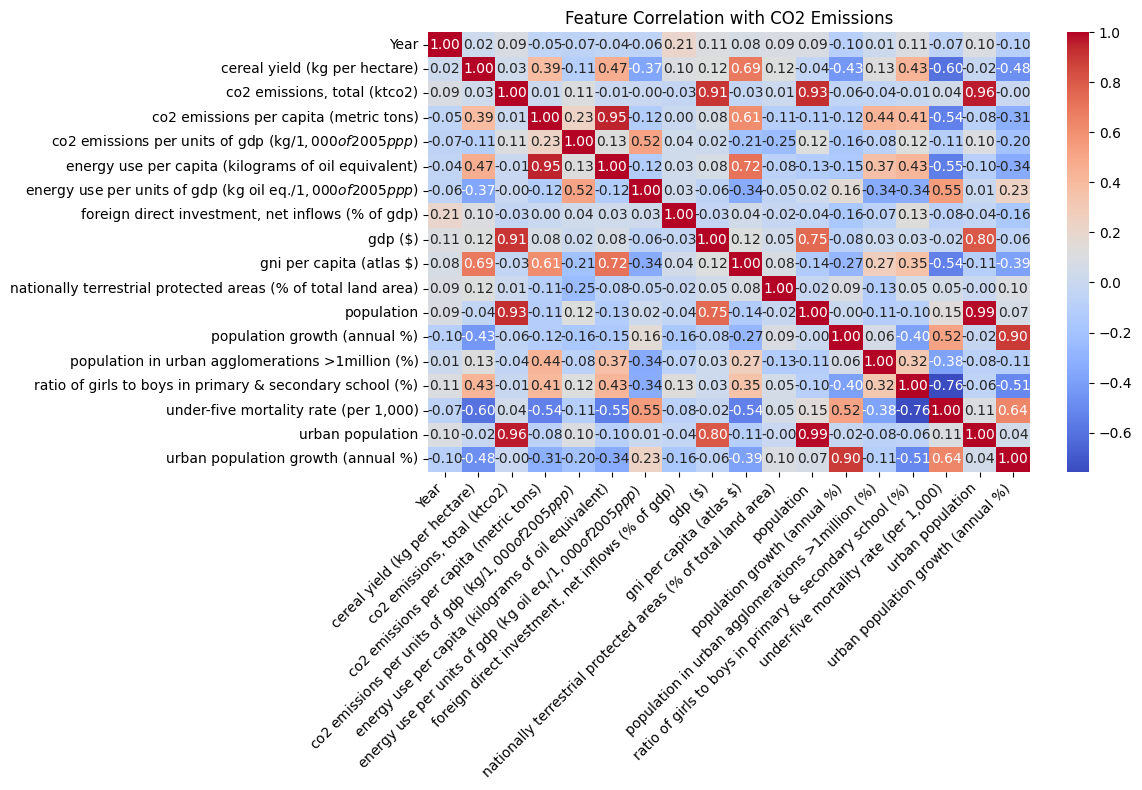

In [ ]:

plt.figure(figsize=(12, 8))

# Compute correlation
corr = df.select_dtypes(include=['float64', 'int64']).corr()

# Format column names to prevent LaTeX interpretation
formatted_columns = [col.replace('_', ' ') for col in corr.columns]
corr.columns = formatted_columns
corr.index = formatted_columns

# Plot heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=1, yticklabels=1)
plt.title("Feature Correlation with CO2 Emissions")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


CO₂ vs GDP (Bubble Chart)

/tmp/ipython-input-10-480801029.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


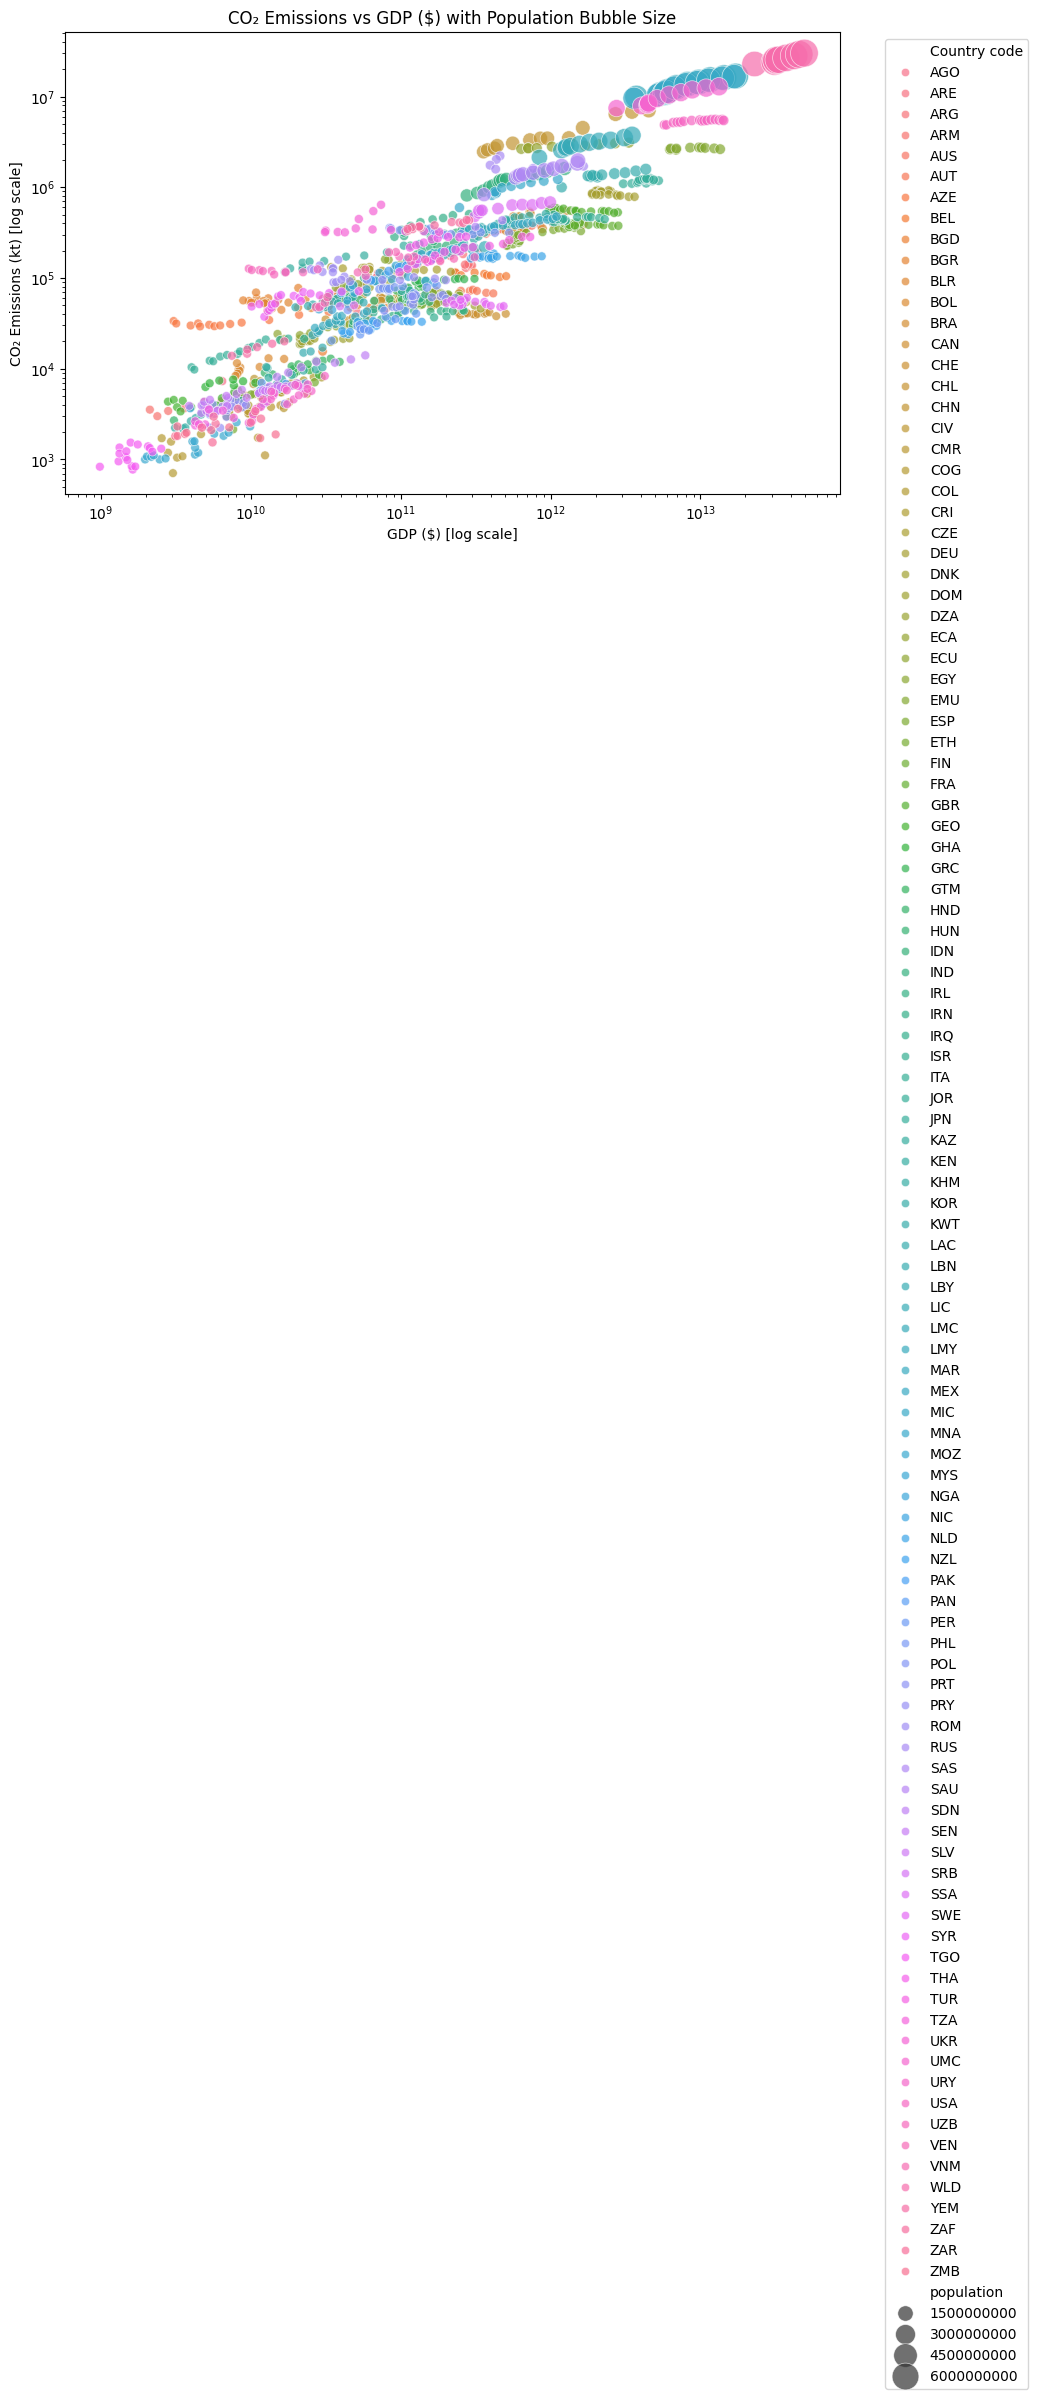

In [ ]:

 CO₂ vs GDP (Bubble Chart)
plt.figure(figsize=(10, 6))
subset = df[df['gdp_($)'] < 5e13]  # remove outliers
sns.scatterplot(
    data=subset,
    x='gdp_($)', y='co2_emissions,_total_(ktco2)',
    size='population', hue='Country code', alpha=0.7, sizes=(40, 400)
)
plt.title('CO₂ Emissions vs GDP ($) with Population Bubble Size')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('GDP ($) [log scale]')
plt.ylabel('CO₂ Emissions (kt) [log scale]')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

 CO₂ vs Energy Use per Capita

/tmp/ipython-input-11-2487516213.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


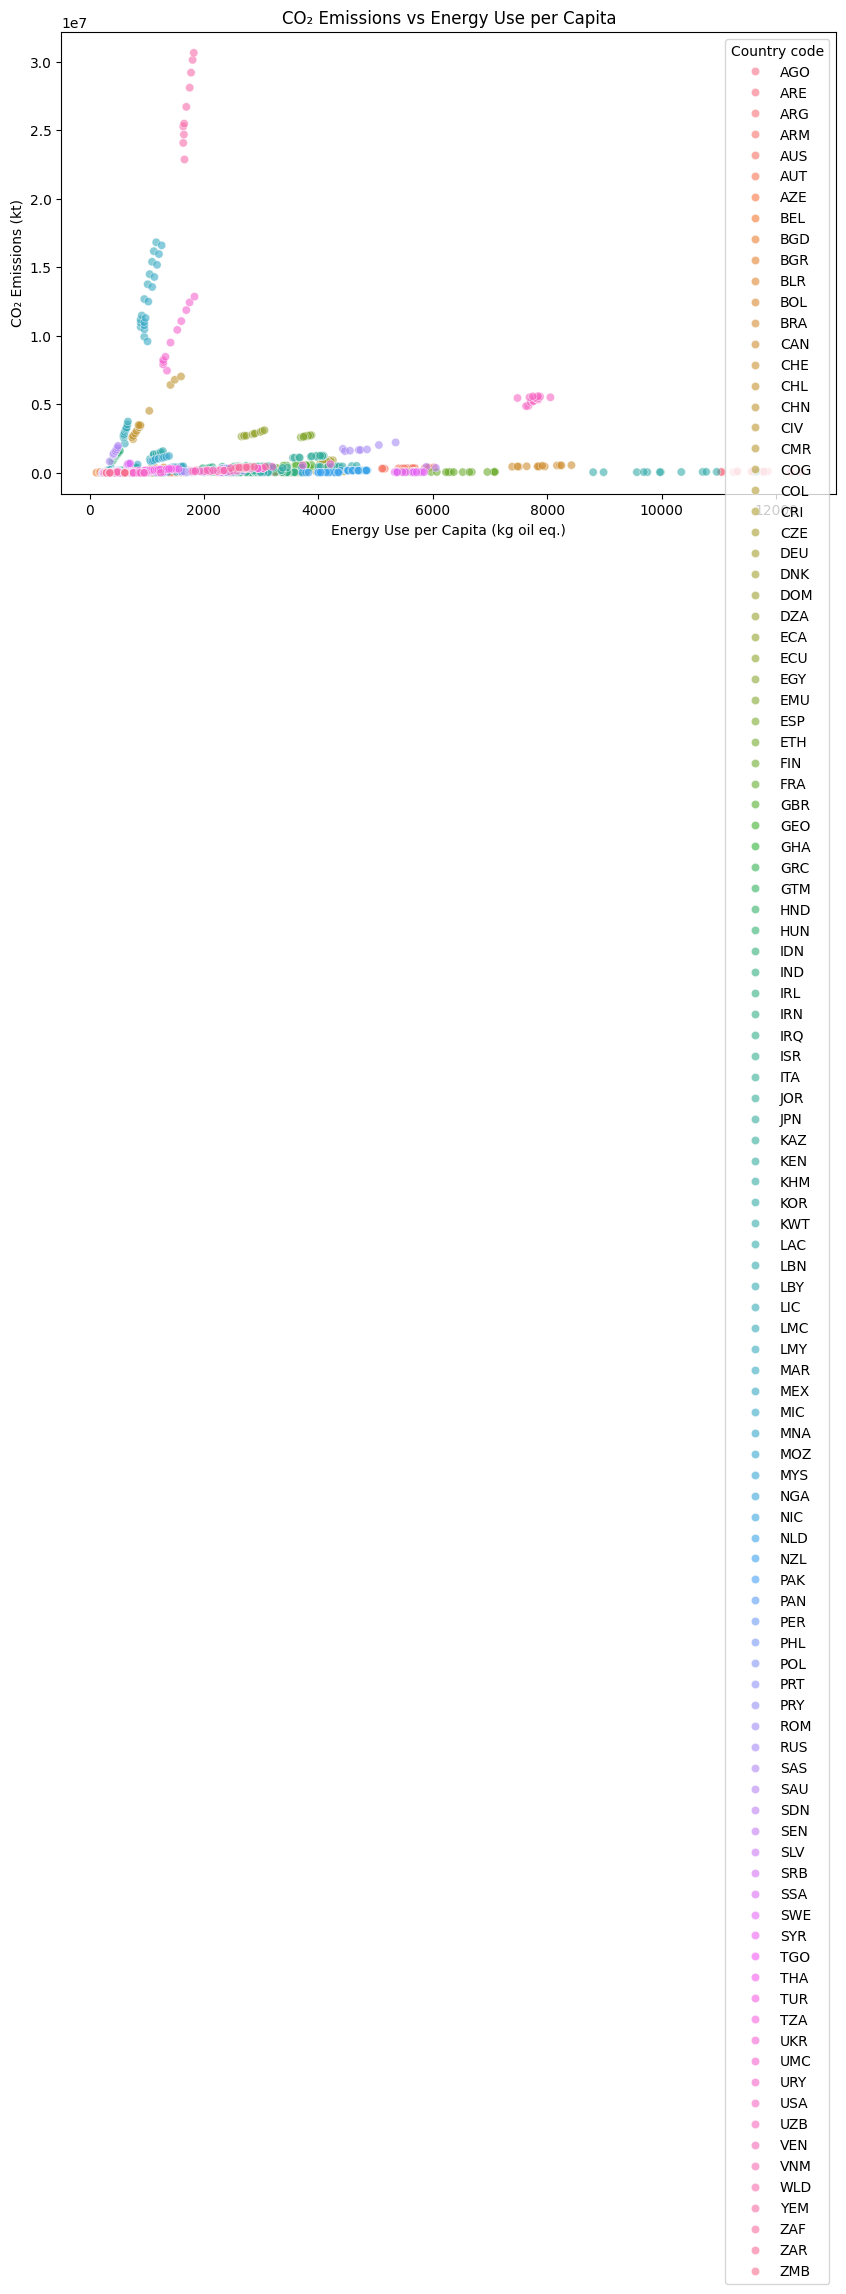

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='energy_use_per_capita_(kilograms_of_oil_equivalent)',
    y='co2_emissions,_total_(ktco2)',
    hue='Country code',
    alpha=0.6
)
plt.title("CO₂ Emissions vs Energy Use per Capita")
plt.xlabel("Energy Use per Capita (kg oil eq.)")
plt.ylabel("CO₂ Emissions (kt)")
plt.tight_layout()
plt.show()

Time Series for a Single Country (Example: United States 'USA')

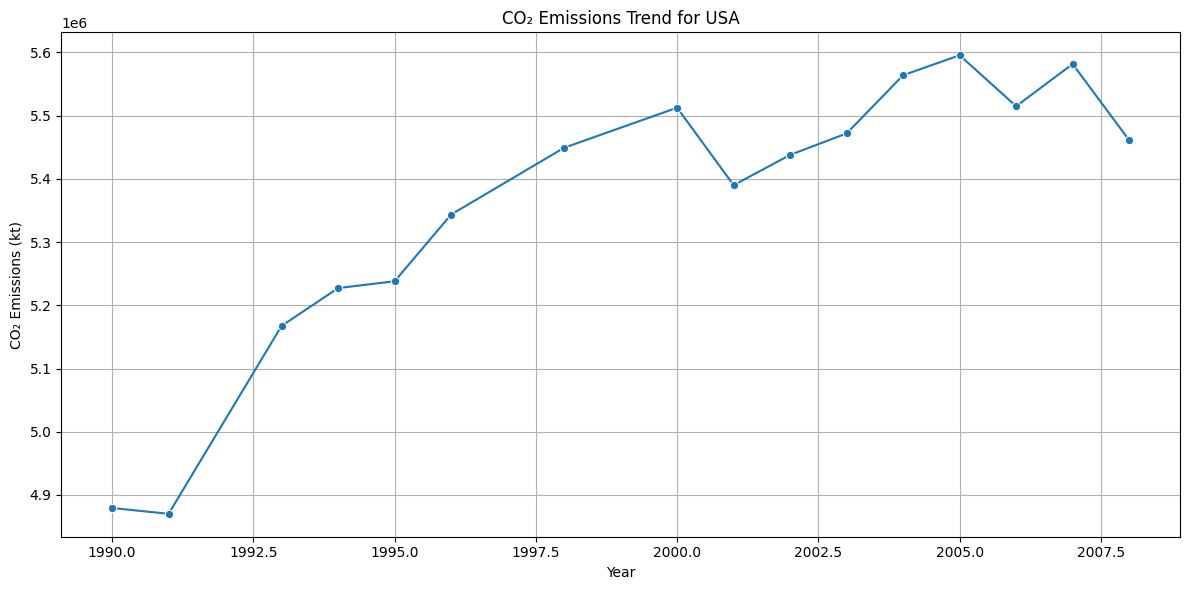

In [ ]:
Time Series for a Single Country (Example: United States 'USA')
if 'USA' in df['Country code'].unique():
    plt.figure(figsize=(12, 6))
    usa_data = df[df['Country code'] == 'USA']
    sns.lineplot(data=usa_data, x='Year', y='co2_emissions,_total_(ktco2)', marker='o')
    plt.title("CO₂ Emissions Trend for USA")
    plt.ylabel("CO₂ Emissions (kt)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Country code 'USA' not found in dataset.")


Energy Use per GDP vs CO₂ Emissions per GDP

/tmp/ipython-input-15-1623097329.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


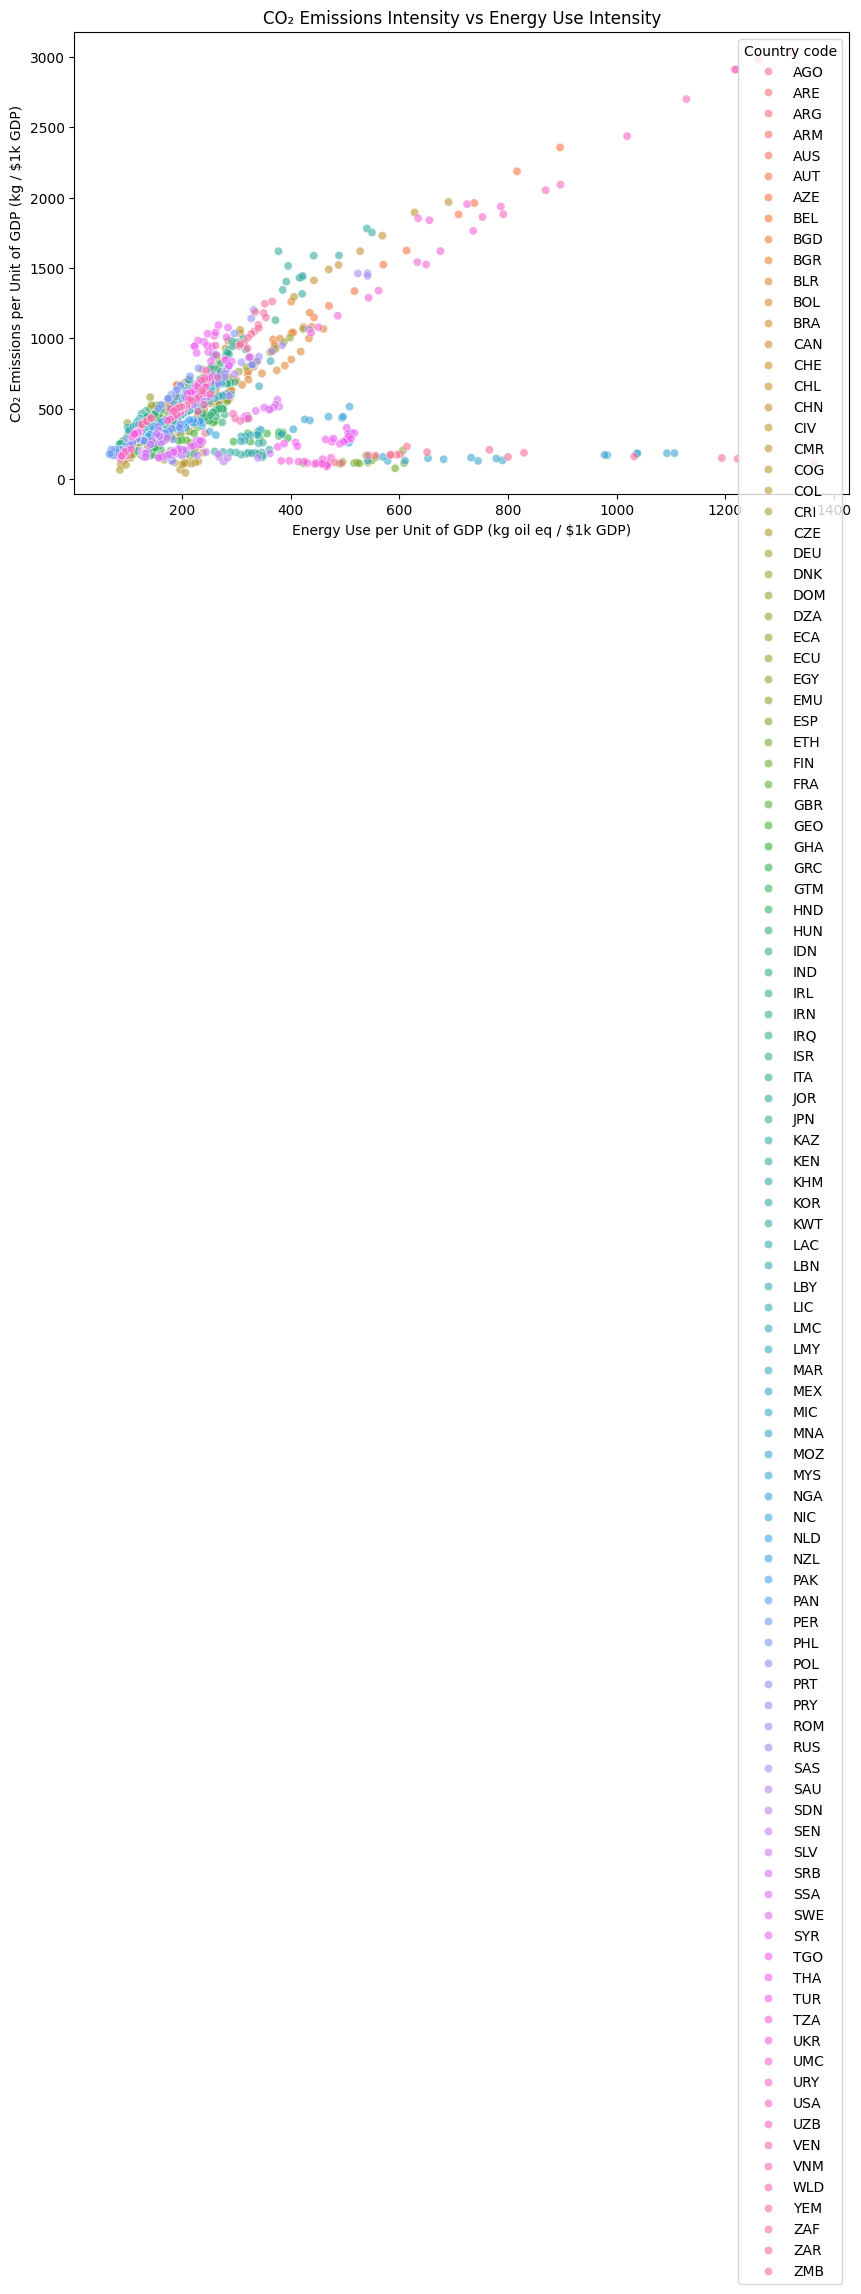

In [ ]:
Energy Use per GDP vs CO₂ Emissions per GDP
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='energy_use_per_units_of_gdp_(kg_oil_eq./$1,000_of_2005_ppp_$)',
    y='co2_emissions_per_units_of_gdp_(kg/$1,000_of_2005_ppp_$)',
    hue='Country code',
    alpha=0.6
)
plt.title("CO₂ Emissions Intensity vs Energy Use Intensity")
plt.xlabel("Energy Use per Unit of GDP (kg oil eq / $1k GDP)")
plt.ylabel("CO₂ Emissions per Unit of GDP (kg / $1k GDP)")
plt.tight_layout()
plt.show()
